In [1]:
!unzip "/content/drive/MyDrive/trainSet.zip"

Streaming output truncated to the last 5000 lines.
 extracting: trainSet/f84aa25d-DM_Shining_Star_Regular-12px-italic-bold.png  
  inflating: trainSet/f84aab06-TH_Chakra_Petch-20px-normal-bold.png  
 extracting: trainSet/f84b6f46-Angsana_New-12px-normal-bold.png  
  inflating: trainSet/f84bf11a-TH_Mali_Grade6-14px-italic-bold.png  
  inflating: trainSet/f84bf30c-FC_Knomphing_Regular-24px-italic-normal.png  
  inflating: trainSet/f84cf1b6-TH_Charm_of_AU-20px-italic-bold.png  
 extracting: trainSet/f84d0367-fonttintin-12px-normal-normal.png  
 extracting: trainSet/f84d2d8a-TH_Sarabun-22px-italic-bold.png  
 extracting: trainSet/f84e0cd3-TH_Charm_of_AU-20px-normal-bold.png  
  inflating: trainSet/f84e0e65-Cordia_New-14px-normal-normal.png  
 extracting: trainSet/f84e5406-DM_Shining_Star_Regular-12px-italic-bold.png  
 extracting: trainSet/f84e9d4-FC_Knomphing_Regular-16px-normal-bold.png  
 extracting: trainSet/f84f2e07-TH_Charm_of_AU-16px-italic-bold.png  
  inflating: trainSet/f84f5303-

In [2]:
import os
from pathlib import Path
from os import listdir
import keras
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D , UpSampling2D ,Conv2DTranspose

In [3]:
# Path to the data directory
data_dir1 = Path("/content/trainSet")
# Get list of all the images
images = listdir(data_dir1)
id=[]
text=[]
font=[]
size=[]
italic=[]
bold=[]

for img in images:
  id.append(img.split(".png")[0].split('-')[0])
  font.append(img.split(".png")[0].split('-')[1])
  size.append(img.split(".png")[0].split('-')[2])
  italic.append(img.split(".png")[0].split('-')[3])
  bold.append(img.split(".png")[0].split('-')[4])

print("Number of images found: ", len(id))

Number of images found:  156010


In [4]:
import pandas as pd
data ={'Id':id, 'Font':font,'italic':italic,'bold':bold}
df = pd.DataFrame(data)
df

,Id,Font,italic,bold
0,cb138b41,DM_Shining_Star_Regular,italic,normal
1,1fa6bf5c,TH_Mali_Grade6,normal,normal
2,30c2ea04,TH_Mali_Grade6,normal,bold
3,c1445977,FC_Knomphing_Regular,italic,normal
4,a24d491d,TH_Mali_Grade6,italic,bold
...,...,...,...,...
156005,d0ea7965,FC_Knomphing_Regular,normal,bold
156006,40a1036d,TH_Sarabun,italic,normal
156007,e88ad576,FC_Knomphing_Regular,italic,bold
156008,5a3b293f,Kunlasatri,italic,bold


In [5]:
import tensorflow as tf
import keras
from keras import utils
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def conv_label(label1,label2):
  if label1 == 'normal' and label2 == 'normal':
    return 0
  elif label1 == 'normal' and label2 == 'bold':
    return 1
  elif label1 == 'italic' and label2 == 'normal':
    return 2
  elif label1 == 'italic' and label2 == 'bold':
    return 3

In [7]:
data=[]
labels=[]
for img in images:
  img2 = cv2.imread("/content/trainSet/"+img)
  #img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
  img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
  threshold, binarizedImage = cv2.threshold(img2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  #binarizedImage = cv2.adaptiveThreshold(img2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 199, 5)
  img_height=100
  img_width=100
  dim=(img_height,img_width)
  resized = cv2.resize(binarizedImage, dim)
  data.append(resized)
  label1 = img.split(".png")[0].split('-')[3]
  label2 = img.split(".png")[0].split('-')[4]
  labels.append(conv_label(label1,label2))

(array([37413.,     0.,     0., 39125.,     0.,     0., 39079.,     0.,
            0., 40393.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

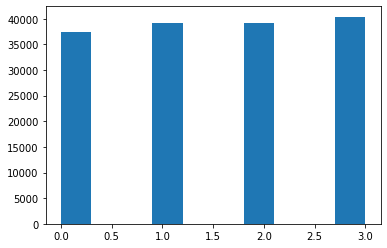

In [8]:
plt.hist(labels,bins=10)

In [9]:
data1=np.array(data)
labels = np.array(labels)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1, labels, test_size=0.20, random_state=42,stratify=labels)

In [11]:
X_train = X_train.astype('float32')
X_train/=255
X_train = X_train.reshape(124808, 100, 100,1)

X_test = X_test.astype('float32')
X_test/=255
X_test = X_test.reshape(31202, 100, 100,1)

In [12]:
Y_train= tf.keras.utils.to_categorical(y_train, num_classes=4, dtype='float32')
Y_test = tf.keras.utils.to_categorical(y_test, num_classes=4, dtype='float32')

In [13]:
from tensorflow.keras.applications.resnet50 import ResNet50
resnet = tf.keras.applications.resnet50.ResNet50(include_top=False,weights= 'imagenet',input_shape= (100,100,3))
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 106, 106, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 50, 50, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1_conv[0][0]']      

In [14]:
from tensorflow.keras import layers, Model

In [ ]:
def create_conv_model(my_learning_rate):
  model = Sequential()                                 # Linear stacking of layers

  # Convolution Layer 1
  model.add(Conv2D(64, (6, 6), input_shape=(100,100,1))) # 32 different 3x3 kernels -- so 32 feature maps
  model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
  convLayer01 = Activation('relu')                     # activation
  model.add(convLayer01)

  # Convolution Layer 2
  model.add(Conv2D(32, (3, 3)))                        # 32 different 3x3 kernels -- so 32 feature maps
  model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
  model.add(Activation('relu'))                        # activation
  convLayer02 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
  model.add(convLayer02)

  # Convolution Layer 3
  model.add(Conv2D(64,(3, 3)))                         # 64 different 3x3 kernels -- so 64 feature maps
  model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
  convLayer03 = Activation('relu')                     # activation
  model.add(convLayer03)

  # Convolution Layer 4
  model.add(Conv2D(64, (3, 3)))                        # 64 different 3x3 kernels -- so 64 feature maps
  model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
  model.add(Activation('relu'))                        # activation
  convLayer04 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
  model.add(convLayer04)
  model.add(Flatten())                                 # Flatten final 4x4x64 output matrix into a 1024-length vector

  # Fully Connected Layer 5
  model.add(Dense(512))                                # 512 FCN nodes
  model.add(BatchNormalization())                      # normalization
  model.add(Activation('relu'))                        # activation

  # Fully Connected Layer 6                       
  model.add(Dropout(0.2))                              # 20% dropout of randomly selected nodes
  model.add(Dense(10))                                 # final 10 FCN nodes
  model.add(Activation('softmax'))                     # softmax activation

  return model

In [15]:
x_in = keras.layers.Input(shape=(100, 100, 1))
x = keras.layers.Conv2D(3, 1)(x_in)
x = resnet(x)
# fit output
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(4, activation='softmax')(x)
model = Model(x_in, x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 3)       6         
                                                                 
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 4)                 131076    
                                                                 
Total params: 23,718,794
Trainable params: 23,665,674
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss=keras.losses.CategoricalCrossentropy(),metrics=[keras.metrics.CategoricalAccuracy()])
model.fit(X_train, Y_train, batch_size=128 ,epochs=10, validation_data=(X_test,Y_test))

Epoch 1/10
976/976 [==============================] - 358s 358ms/step - loss: 1.8790 - categorical_accuracy: 0.3798 - val_loss: 1.5072 - val_categorical_accuracy: 0.3974
Epoch 2/10
976/976 [==============================] - 348s 356ms/step - loss: 1.0784 - categorical_accuracy: 0.5318 - val_loss: 3.0698 - val_categorical_accuracy: 0.3534
Epoch 3/10
976/976 [==============================] - 348s 356ms/step - loss: 0.8808 - categorical_accuracy: 0.6230 - val_loss: 1.5376 - val_categorical_accuracy: 0.4716
Epoch 4/10
976/976 [==============================] - 349s 357ms/step - loss: 0.7404 - categorical_accuracy: 0.6857 - val_loss: 2.0313 - val_categorical_accuracy: 0.4041
Epoch 5/10
976/976 [==============================] - ETA: 0s - loss: 0.6404 - categorical_accuracy: 0.7342